### Unconditional density estmation with a neural spline flow
An example of unconditional density estimation, using the "two moons" distribution.

### Imports

In [1]:
import jax.numpy as jnp
from jax import random
from flowjax.flows import NeuralSplineFlow
from flowjax.train_utils import train_flow
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

### Generate data

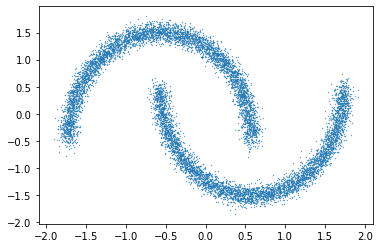

In [2]:
n_samples = 10000
n_bins = 100

scaler = preprocessing.StandardScaler()
x, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
x = scaler.fit_transform(x)
x = jnp.array(x)
plt.scatter(x[:, 0], x[:, 1], s=0.1)

### Train and plot samples

In [3]:
key = random.PRNGKey(1)
key, subkey = random.split(key)

flow = NeuralSplineFlow(
    key=subkey,
    target_dim=x.shape[1])

key, subkey = random.split(key)
flow, losses = train_flow(subkey, flow, x)


100%|██████████| 50/50 [00:57<00:00,  1.15s/it, train=1.16, val=1.13]


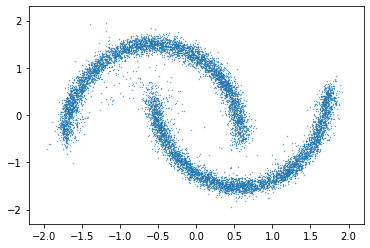

In [4]:
key, subkey = random.split(key)
x_samples = flow.sample(key, n=10000)
plt.scatter(x_samples[:, 0], x_samples[:, 1], s=0.1)
plt.xlim(-2.2, 2.2)
plt.ylim(-2.3, 2.3)
plt.show()

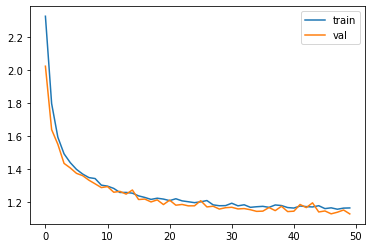

In [5]:
for k, v in losses.items():
    plt.plot(v, label=k)
plt.legend()